In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

data= pd.read_csv('online_shoppers_intention.csv')

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data_cat=data[['Month','Region','Browser','OperatingSystems','Weekend','Revenue','TrafficType','VisitorType']]
data_num=data[['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']]

In [4]:
from sklearn import preprocessing

In [5]:
le=preprocessing.LabelEncoder()

In [6]:
data_cat_le=data_cat.apply(preprocessing.LabelEncoder().fit_transform)

In [7]:
data1=pd.concat([data_num,data_cat_le],axis=1)

In [9]:
X = data1.drop(columns=['Revenue'])
y = data1['Revenue']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
def evaluate_model(model, X, y):
    from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
    
    ypred = model.predict(X)
    cm = confusion_matrix(y, ypred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()
        
    print(classification_report(y, ypred))
    print()
    accuracy = metrics.accuracy_score(y, ypred)
    print(' Accuracy =', accuracy)
    return accuracy

### Logistic Regression

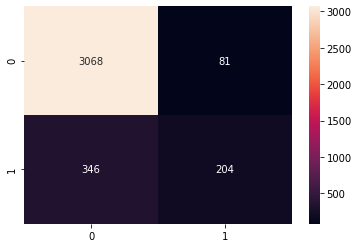

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3149
           1       0.72      0.37      0.49       550

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8845633955123007


In [44]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = evaluate_model(lr_model, X_test, y_test)

### KNN

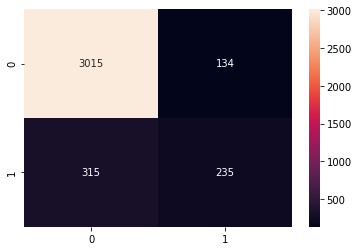

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3149
           1       0.64      0.43      0.51       550

    accuracy                           0.88      3699
   macro avg       0.77      0.69      0.72      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8786158421194917


In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = evaluate_model(knn, X_test, y_test)

### Naive Bayes

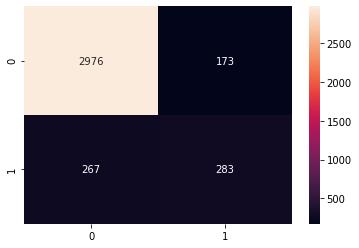

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3149
           1       0.62      0.51      0.56       550

    accuracy                           0.88      3699
   macro avg       0.77      0.73      0.75      3699
weighted avg       0.87      0.88      0.88      3699


 Accuracy = 0.8810489321438226


In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = evaluate_model(nb, X_test, y_test)

### Decision Tree

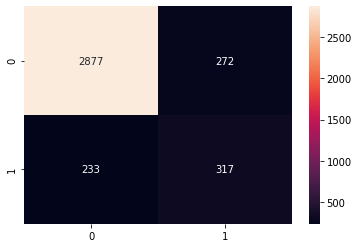

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3149
           1       0.54      0.58      0.56       550

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.74      3699
weighted avg       0.87      0.86      0.87      3699


 Accuracy = 0.8634766153014328


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = evaluate_model(dt, X_test, y_test)

# backward elimination 

In [48]:
X=data1[['ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates',
         'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'VisitorType']]
y=data1['Revenue']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

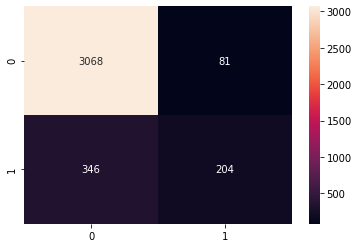

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3149
           1       0.72      0.37      0.49       550

    accuracy                           0.88      3699
   macro avg       0.81      0.67      0.71      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8845633955123007


In [50]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = evaluate_model(lr_model, X_test, y_test)

### KNN

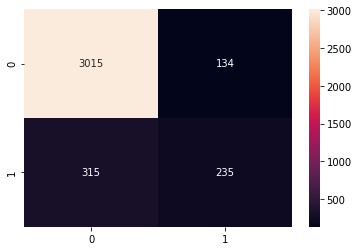

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3149
           1       0.64      0.43      0.51       550

    accuracy                           0.88      3699
   macro avg       0.77      0.69      0.72      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8786158421194917


In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = evaluate_model(knn, X_test, y_test)

### Naive Bayes

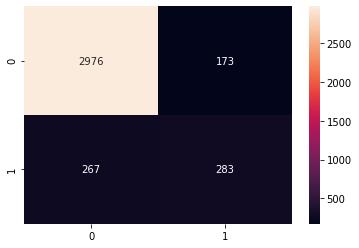

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3149
           1       0.62      0.51      0.56       550

    accuracy                           0.88      3699
   macro avg       0.77      0.73      0.75      3699
weighted avg       0.87      0.88      0.88      3699


 Accuracy = 0.8810489321438226


In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = evaluate_model(nb, X_test, y_test)

### Decision Tree

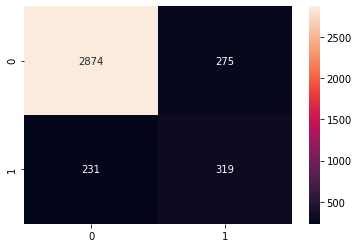

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3149
           1       0.54      0.58      0.56       550

    accuracy                           0.86      3699
   macro avg       0.73      0.75      0.74      3699
weighted avg       0.87      0.86      0.87      3699


 Accuracy = 0.863206271965396


In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = evaluate_model(dt, X_test, y_test)

# recursive feature elimination

In [54]:
X=data1[['Informational','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month','VisitorType', 'Weekend']]
y=data1['Revenue']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

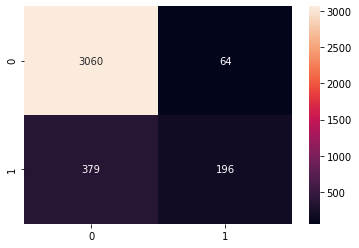

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.75      0.34      0.47       575

    accuracy                           0.88      3699
   macro avg       0.82      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699


 Accuracy = 0.8802379021357124


In [61]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = evaluate_model(lr_model, X_test, y_test)

### KNN

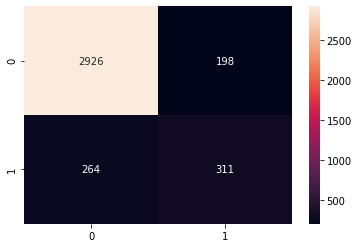

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3124
           1       0.61      0.54      0.57       575

    accuracy                           0.88      3699
   macro avg       0.76      0.74      0.75      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8751013787510138


In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = evaluate_model(knn, X_test, y_test)

### Naive Bayes

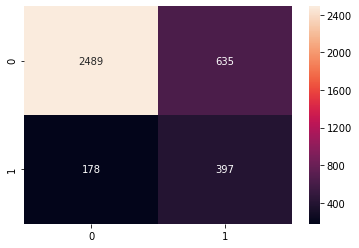

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3124
           1       0.38      0.69      0.49       575

    accuracy                           0.78      3699
   macro avg       0.66      0.74      0.68      3699
weighted avg       0.85      0.78      0.80      3699


 Accuracy = 0.7802108678021087


In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = evaluate_model(nb, X_test, y_test)

### Decision Tree

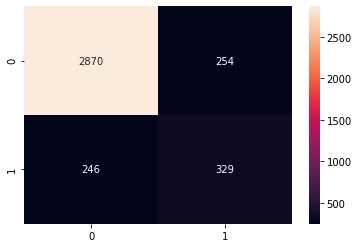

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3124
           1       0.56      0.57      0.57       575

    accuracy                           0.86      3699
   macro avg       0.74      0.75      0.74      3699
weighted avg       0.87      0.86      0.87      3699


 Accuracy = 0.8648283319816167


In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = evaluate_model(dt, X_test, y_test)

# Forward selection

In [65]:
X=data1[['PageValues',
 'ProductRelated',
 'ExitRates',
 'Month',
 'VisitorType',
 'SpecialDay',
 'ProductRelated_Duration',
 'BounceRates',
 'OperatingSystems']]
y=data1['Revenue']

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

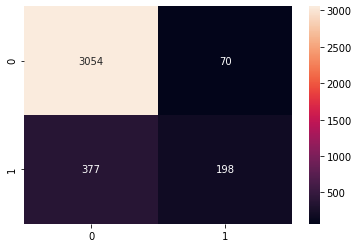

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3124
           1       0.74      0.34      0.47       575

    accuracy                           0.88      3699
   macro avg       0.81      0.66      0.70      3699
weighted avg       0.87      0.88      0.86      3699


 Accuracy = 0.8791565287915653


In [67]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_acc = evaluate_model(lr_model, X_test, y_test)

### KNN

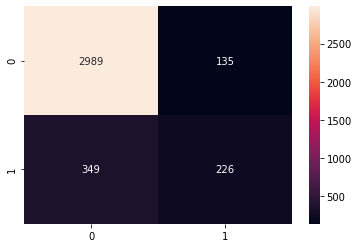

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3124
           1       0.63      0.39      0.48       575

    accuracy                           0.87      3699
   macro avg       0.76      0.67      0.70      3699
weighted avg       0.85      0.87      0.86      3699


 Accuracy = 0.869153825358205


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_acc = evaluate_model(knn, X_test, y_test)

### Naive Bayes

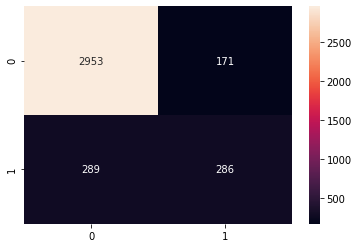

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3124
           1       0.63      0.50      0.55       575

    accuracy                           0.88      3699
   macro avg       0.77      0.72      0.74      3699
weighted avg       0.87      0.88      0.87      3699


 Accuracy = 0.8756420654230873


In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_acc = evaluate_model(nb, X_test, y_test)

### Decision Tree

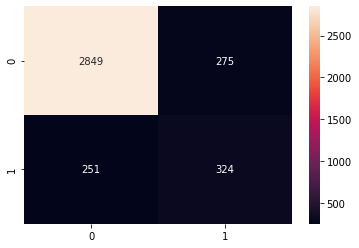

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3124
           1       0.54      0.56      0.55       575

    accuracy                           0.86      3699
   macro avg       0.73      0.74      0.73      3699
weighted avg       0.86      0.86      0.86      3699


 Accuracy = 0.8577994052446607


In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_acc = evaluate_model(dt, X_test, y_test)